In [1]:
army = read.csv("army-physical.csv", header=TRUE, sep=",")
head(army)
str(army)

,seq,date,bust,sleeve,height,waist,crotch,head,foot,weight
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,52094,2014,91.8,88.5,177.8,84.1,83.9,57.8,27.2,78.8
2,57714,2014,94.7,86.3,171.9,89.2,78.6,58.6,26.8,71.9
3,10741,20140224,114.0,89.4,179.3,109.8,84.8,60.8,29.9,105.9
4,8843,2013,105.7,88.1,177.0,94.4,77.9,57.6,28.0,81.1
5,19853,20140414,100.6,87.5,175.7,92.6,76.4,58.1,27.8,78.8
6,42241,2013,104.2,88.6,176.5,98.1,81.7,60.4,26.7,83.8


'data.frame':	200 obs. of  10 variables:
 $ seq   : int  52094 57714 10741 8843 19853 42241 46561 40117 64329 26347 ...
 $ date  : int  2014 2014 20140224 2013 20140414 2013 2013 2013 2014 2013 ...
 $ bust  : num  91.8 94.7 114 105.7 100.6 ...
 $ sleeve: num  88.5 86.3 89.4 88.1 87.5 88.6 83.4 90.6 85 86.6 ...
 $ height: num  178 172 179 177 176 ...
 $ waist : num  84.1 89.2 109.8 94.4 92.6 ...
 $ crotch: num  83.9 78.6 84.8 77.9 76.4 81.7 73.8 85.1 74.5 76.6 ...
 $ head  : num  57.8 58.6 60.8 57.6 58.1 60.4 56.7 60 56.7 54.3 ...
 $ foot  : num  27.2 26.8 29.9 28 27.8 26.7 30.8 27.1 26.5 27.9 ...
 $ weight: num  78.8 71.9 105.9 81.1 78.8 ...


In [4]:
# 사후분포 파라미터 계산
x = army$height
n = length(x)
xbar = mean(x)
xsd = sd(x)

mu0 = mean(x)
kappa0 = 0.1
nu0 = 0.1
sigma02 = var(x)

nu1 = nu0 + n
kappa1 = kappa0 + n
mu1 = (kappa0 * mu0 + n * xbar) / kappa1
sigma12 = (kappa0 * n * (xbar - mu0)^2 / kappa1 + (n-1) * xsd^2 + nu0 * sigma02) / nu1

In [6]:
dlct = function(x, location, scale, ... )
{
    dt((x-location)/scale,...)/scale
}

theta = seq(from=160, to=190, length=1000)
prior.den = dlct(theta, location=mu0, scale=sqrt(sigma02), df=nu0)
post.den = dlct(theta, location=mu1, scale=sqrt(sigma12/kappa1), df=nu1)


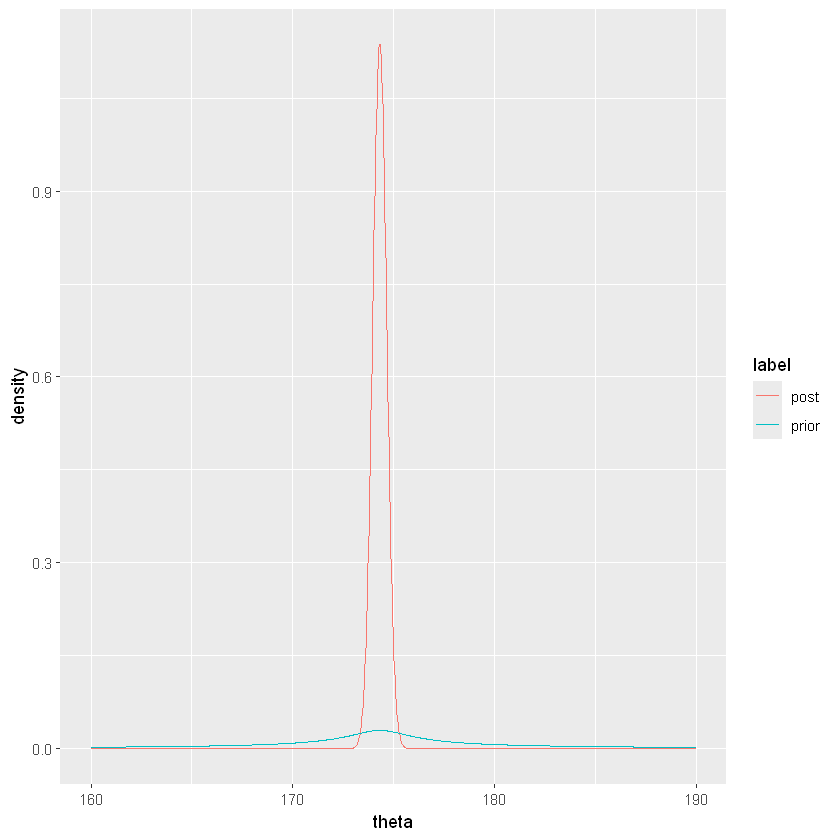

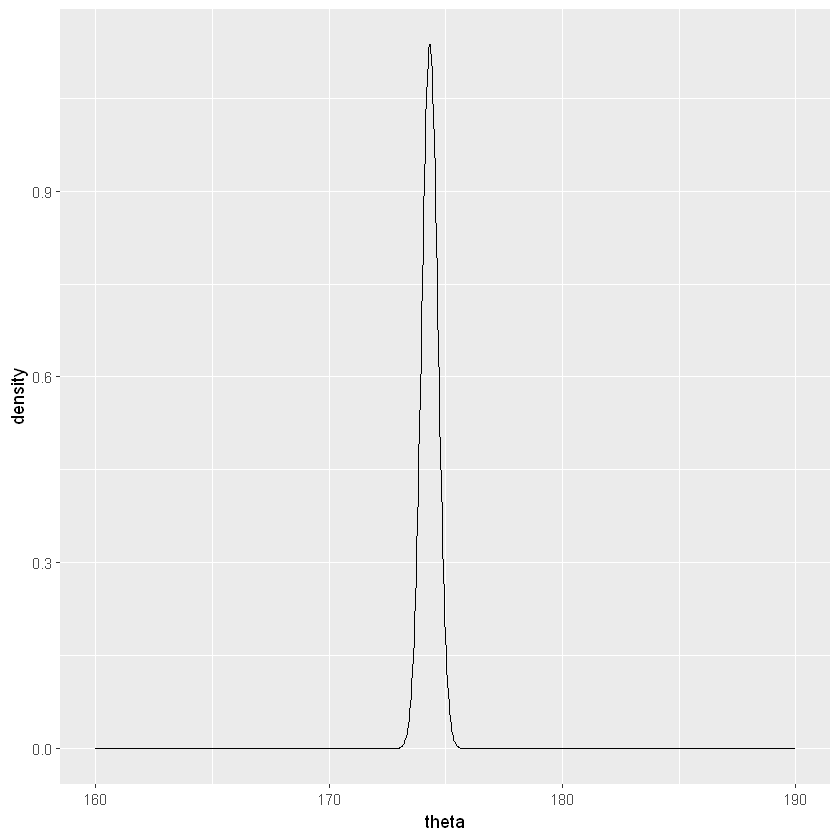

In [12]:
library(dplyr)
library(ggplot2)

pp = data.frame(theta=c(theta, theta), density=c(prior.den, post.den),
                label=c(rep("prior", length(prior.den)), rep("post", length(post.den))))
pp %>% ggplot(aes(x=theta, y=density, color=label)) + geom_line()
pp %>% filter(label=="post") %>% ggplot(aes(x=theta, y=density)) + geom_line()